### Introduction

New York City is the CITY. It is one of the most renowned city in the world. It is the mecca of fashion, and at the same time, one may argue it is the melting pot, literally the melting pot of different foods. As the city is populated with people from various backgrounds, the residents are also open to different types of food, including Vietnamese pho.

This final project explores various locations within NYC and find the best location to open up a Vietnamese PHO noodle house. As Vietnamese pho noodle is gaining popularity among all types of people from all various ethniticies and backgrounds, there are stakeholders willing to open new pho noodle houses within the city of NY. Pho is a Vietnamese soup consisting of broth, rice noodles, herbs, and meat, sometimes chicken. Pho is a popular food in Vietnam where it is served in households, street stalls and restaurants countrywide. During the 2000s, pho restaurants in the United States generated US$500 million in annual revenue, according to an unofficial estimate. Pho can now be found in cafeterias at many college and corporate campuses, especially on the West Coast. However, there is a lack of pho restaurants in the NYC and thus is a demand for this type of restaurant. Thus, this project is to provide an answer to the stakeholders of the "best location within NYC to open a new pho noodle house." As opening a new pho house would require a big investment and time from the stakeholder's perspective, it would be wise decision to determine where other Vietnamese noodle houses are located in the NYC and avoid opening an area next to another restaurant offering similar menu items (i.e. pho noodle soup). Furthermore, the ideal location of the pho house would be a location where the residents demand pho noodle soup (or Asian food), so that when the restaurant opens, there would be minimal marketing effort in advertising the new restaurant.

### Data

In order to answer the above questions, various information about the NYC is needed, including NYC neighborhoods, boroughs, locations (latitude, longitude), other restaurants, and its respective restaurant ratings and tips are required and helpful. NYC information of above can be retrieved from the data source: https://cocl.us/new_york_dataset

1) From this data, information about Borough, Neighborhood, Latitude, and Longitude would be provided in a table. 2) Next, number of Vietnamese restaurants in each of the Borough would further be determined (e.g. Brooklyn with 1, Manhattan with 2, etc.). 3) Each of the restaurants will also be rated based on "likes", ratings, and tips. 4) Coding will also be entered to identify and visualize neighborhood with the maximum average rating of restaurants 5) Based on the data analysis above, a determination of the location for the best place to open a Vietnamese noodle house will be determined.

In [1]:
!pip install geopy
!pip install folium==0.5.0
!pip install bs4

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 79 kB 10.4 MB/s eta 0:00:01
  Created wheel for folium: file

In [2]:
import pandas as pd
import numpy as np
import requests
#from bs4 import BeautifulSoup
import os
#!conda install -c conda-forge folium=0.5.0 --yes
import folium 
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

print('ALL Done!')

ALL Done!


### Methodology

• Data will be collected from https://cocl.us/new_york_dataset and cleaned and processed into a dataframe.

• FourSquare be used to locate all venues and then filtered by Vietnamese/Pho restaurants. Ratings, tips, and likes by users will be counted and added to the dataframe.

• Data will be sorted based on rankings.

• Finally, the data be will be visually assessed using graphing from Python libraries.

In [3]:
# Define Foursquare Credentials and Version

CLIENT_ID = 'IOQ0N5D1HIFGKMMIWKESME5CAITQO2KK0DL4Y5PCH1OYLJFV' # your Foursquare ID
CLIENT_SECRET = 'XNSVDLVBGX1KJKX0XVOEK5GMFGKPG0GZWO2W55RZGZUKYNAK' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [4]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

In [5]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [6]:
ny_data.shape

(306, 4)

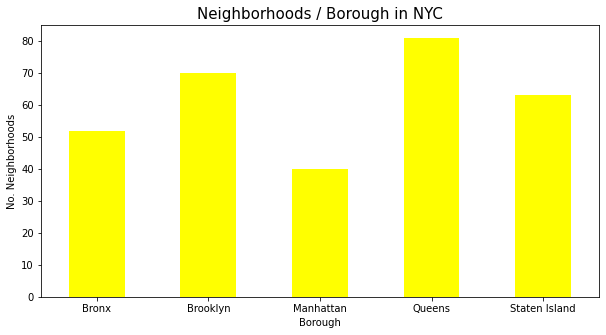

In [7]:
clr = "yellow"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods / Borough in NYC', fontsize = 15)
plt.xlabel('Borough', fontsize = 10)
plt.ylabel('No. Neighborhoods',fontsize = 10)
plt.xticks(rotation = 'horizontal')
plt.show()

Lets analyze further and see how many Vietnamese restaurants there are in each neighborhood and burough and graph the results.

In [9]:
 
# queens followed by brooklyn and staten island has top number of neighborhoods
# prepare neighborhood list that contains vietnamese restaurants
column_names=['Borough', 'Neighborhood', 'ID','Name']
vietnamese_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    vietnamese_restaurants=venues[venues['Category']=='Vietnamese Restaurant']   
    print('(',count,'/',len(ny_data),')','Vietnamese Restaurants in '+Neighborhood+', '+Borough+':'+str(len(vietnamese_restaurants)))
    print(row)
    for resturant_detail in vietnamese_restaurants.values.tolist():
        id, name , category=resturant_detail
        vietnamese_rest_ny = vietnamese_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Vietnamese Restaurants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Vietnamese Restaurants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Vietnamese Restaurants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Vietnamese Restaurants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Vietnamese Restaurants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Vietnamese Restaurants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Vietnamese Restaurants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Vietnamese Restaurants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Vietnamese Restaur

In [10]:
vietnamese_rest_ny.tail()

,Borough,Neighborhood,ID,Name
24,Manhattan,Noho,5e61a124f3bac00008ea048e,Saigon Social
25,Queens,Hunters Point,502e7165e4b0f9a2dcd8ea33,Cyclo
26,Manhattan,Tudor City,5c1a6dd6121384002ce93aff,Sai Gon Dep
27,Brooklyn,Homecrest,4aecde90f964a520e7cb21e3,Phở Vietnam
28,Brooklyn,Homecrest,5da2552cbb7c430008c2c7b6,U Bar


In [11]:
vietnamese_rest_ny.shape

(29, 4)

There are 29 Vietnamese restaurants in NYC. Below, conducting further analysis...

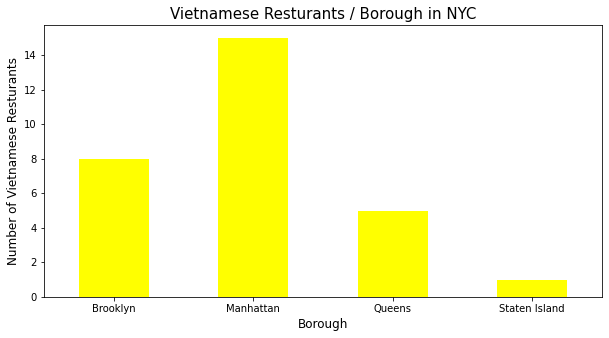

In [12]:
vietnamese_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Vietnamese Resturants / Borough in NYC', fontsize = 15)
plt.xlabel('Borough', fontsize = 12)
plt.ylabel('Number of Vietnamese Resturants', fontsize=12)
plt.xticks(rotation = 'horizontal')
plt.show()

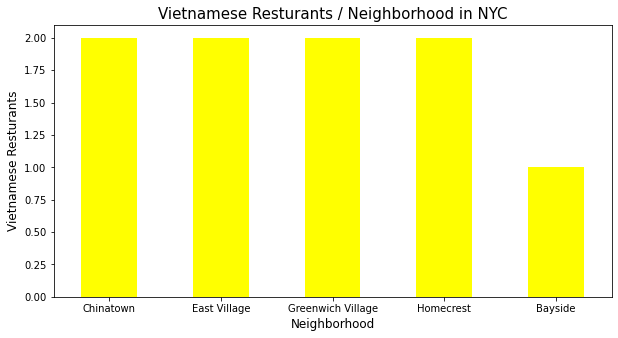

In [15]:
NOofNeigh = 5 # top number for graphing all the same past 5
vietnamese_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Vietnamese Resturants / Neighborhood in NYC', fontsize = 15)
plt.xlabel('Neighborhood', fontsize = 12)
plt.ylabel('Vietnamese Resturants', fontsize=12)
plt.xticks(rotation = 'horizontal')
plt.show()

In [16]:
vietnamese_rest_ny[vietnamese_rest_ny['Neighborhood']=='Chinatown']

,Borough,Neighborhood,ID,Name
5,Manhattan,Chinatown,4388f700f964a520162b1fe3,Phở Grand
6,Manhattan,Chinatown,4a7e3d0cf964a52088f11fe3,Nam Son Vietnamese Restaurant


In [17]:
vietnamese_rest_ny[vietnamese_rest_ny['Neighborhood']=='East Village']

,Borough,Neighborhood,ID,Name
13,Manhattan,East Village,58498a94f68d8d67be8e893c,Hanoi House
14,Manhattan,East Village,4eee5e0693add02fcd39aa10,Xe Máy Sandwich Shop


In [18]:
vietnamese_rest_ny[vietnamese_rest_ny['Neighborhood']=='Greenwich Village']

,Borough,Neighborhood,ID,Name
11,Manhattan,Greenwich Village,5925d43fa306194f4fcc6e4a,Hello Saigon
12,Manhattan,Greenwich Village,4ce08a08ffcf370469b12082,Saigon Shack


In [19]:
vietnamese_rest_ny[vietnamese_rest_ny['Neighborhood']=='Homecrest']

,Borough,Neighborhood,ID,Name
27,Brooklyn,Homecrest,4aecde90f964a520e7cb21e3,Phở Vietnam
28,Brooklyn,Homecrest,5da2552cbb7c430008c2c7b6,U Bar


In [23]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
vietnamese_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1
for row in vietnamese_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(vietnamese_rest_ny),')','processed')
    vietnamese_rest_stats_ny = vietnamese_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
vietnamese_rest_stats_ny.tail()

{'meta': {'code': 200, 'requestId': '6071e05ed9499c362a44618e'}, 'response': {'venue': {'id': '5aa427100a464d2cf717b688', 'name': 'Đi ăn Đi', 'contact': {'instagram': 'diandi.nyc'}, 'location': {'address': '68 Greenpoint Ave', 'lat': 40.7298006838517, 'lng': -73.9582564594443, 'labeledLatLngs': [{'label': 'display', 'lat': 40.7298006838517, 'lng': -73.9582564594443}], 'postalCode': '11222', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['68 Greenpoint Ave', 'New York, NY 11222', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/%C4%91i-%C4%83n-%C4%91i/5aa427100a464d2cf717b688', 'categories': [{'id': '4bf58dd8d48988d14a941735', 'name': 'Vietnamese Restaurant', 'pluralName': 'Vietnamese Restaurants', 'shortName': 'Vietnamese', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/vietnamese_', 'suffix': '.png'}, 'primary': True}, {'id': '4bf58dd8d48988d1d1941735', 'name': 'Noodle House', 'pluralName': 'Noodle Houses', 

KeyError: 'venue'

In [24]:
vietnamese_rest_stats_ny.shape

(21, 7)

In [25]:
vietnamese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       21 non-null     object 
 1   Neighborhood  21 non-null     object 
 2   ID            21 non-null     object 
 3   Name          21 non-null     object 
 4   Likes         21 non-null     object 
 5   Rating        21 non-null     float64
 6   Tips          21 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.3+ KB


In [26]:
vietnamese_rest_stats_ny['Likes']=vietnamese_rest_stats_ny['Likes'].astype('float64')
vietnamese_rest_stats_ny['Tips']=vietnamese_rest_stats_ny['Tips'].astype('float64')
vietnamese_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       21 non-null     object 
 1   Neighborhood  21 non-null     object 
 2   ID            21 non-null     object 
 3   Name          21 non-null     object 
 4   Likes         21 non-null     float64
 5   Rating        21 non-null     float64
 6   Tips          21 non-null     float64
dtypes: float64(3), object(4)
memory usage: 1.3+ KB


In [27]:
vietnamese_rest_stats_ny.describe()

,Likes,Rating,Tips
count,21.000000,21.000000,21.000000
mean,196.142857,8.000000,63.095238
std,302.320738,0.950789,90.426160
min,7.000000,5.800000,2.000000
25%,24.000000,7.800000,8.000000
50%,65.000000,8.300000,19.000000
75%,255.000000,8.600000,68.000000
max,1374.000000,9.200000,390.000000


In [28]:
# Resturant with maximum Likes
vietnamese_rest_stats_ny.iloc[vietnamese_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood           Greenwich Village
ID              4ce08a08ffcf370469b12082
Name                        Saigon Shack
Likes                               1374
Rating                                 9
Tips                                 390
Name: 12, dtype: object

In [30]:
# Resturant with maximum Ratings
vietnamese_rest_stats_ny.iloc[vietnamese_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                East Village
ID              4eee5e0693add02fcd39aa10
Name                Xe Máy Sandwich Shop
Likes                                346
Rating                               9.2
Tips                                 126
Name: 14, dtype: object

In [31]:
# Resturant with maximum Tips
vietnamese_rest_stats_ny.iloc[vietnamese_rest_stats_ny['Tips'].idxmax()]

Borough                        Manhattan
Neighborhood           Greenwich Village
ID              4ce08a08ffcf370469b12082
Name                        Saigon Shack
Likes                               1374
Rating                                 9
Tips                                 390
Name: 12, dtype: object

In [32]:
ny_neighborhood_stats=vietnamese_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
4,East Village,8.95
6,Fort Greene,8.80
7,Greenpoint,8.80
8,Greenwich Village,8.70
11,Manhattan Valley,8.60
13,Murray Hill,8.40
12,Midtown,8.40
2,Chinatown,8.35
9,Little Italy,8.20
17,Yorkville,8.20


In [33]:
ny_borough_stats=vietnamese_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Manhattan,8.491667
0,Brooklyn,7.880000
2,Queens,6.675000


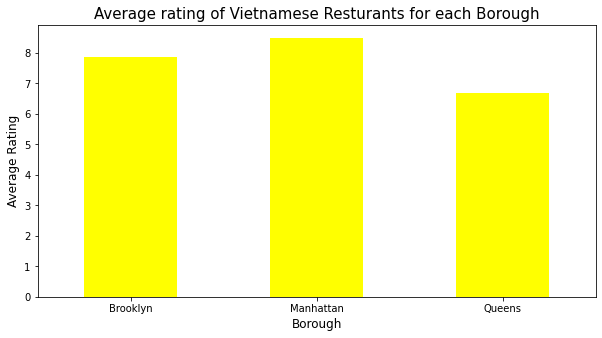

In [34]:
vietnamese_rest_stats_ny.groupby('Borough').mean()['Rating'].plot.bar(figsize=(10,5), color=clr)
plt.title('Average rating of Vietnamese Resturants for each Borough', fontsize=15)
#On x-axis
plt.xlabel('Borough', fontsize = 12)
#On y-axis
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation = 'horizontal')
plt.show()

Visualizing through a map the neighborhoods with an average rating greater than or equal to 8 after joining the approprite dfs to include latitudes and longitudes.

In [37]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.0]
ny_neighborhood_stats

,Neighborhood,Average Rating
2,Chinatown,8.35
4,East Village,8.95
6,Fort Greene,8.80
7,Greenpoint,8.80
8,Greenwich Village,8.70
9,Little Italy,8.20
11,Manhattan Valley,8.60
12,Midtown,8.40
13,Murray Hill,8.40
16,Upper West Side,8.10


In [38]:
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Manhattan,Chinatown,40.715618,-73.994279,8.35
1,Manhattan,East Village,40.727847,-73.982226,8.95
2,Brooklyn,Fort Greene,40.688527,-73.972906,8.80
3,Brooklyn,Greenpoint,40.730201,-73.954241,8.80
4,Manhattan,Greenwich Village,40.726933,-73.999914,8.70
5,Manhattan,Little Italy,40.719324,-73.997305,8.20
6,Manhattan,Manhattan Valley,40.797307,-73.964286,8.60
7,Manhattan,Midtown,40.754691,-73.981669,8.40
8,Manhattan,Murray Hill,40.748303,-73.978332,8.40
9,Queens,Murray Hill,40.764126,-73.812763,8.40


Visualize all NYC buroughs based on average Rating.

In [39]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [43]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(incidents)

### Results

Based on the results, Queens followed by Brooklyn and Staten Island has top number of neighborhoods in NYC. 
There are 29 Vietnamese restaurants in NYC.
Manhattan has the most number of Vietnamese restaurants, thus may be very competitive with other similar Vietnamese restaurants. However, Staten Island and Queens have much less (below 5). Among all the different neighborhoods, Chinatown, East Village, Greenwich Village, and Homecrest each have at least two Vietnamese restaurants.
The Vietnamese restaurant with the maximum likes of 1374 is Saigon Shack in Manhattan, maximum ratings is Xe May Sandwich Shop, also in Manahattan. Saigon Shack also gained the most number of tips of 390.
Neighborhoods with high average ratings are East Village, Forst Green, Greenpoint, Greenwich Village and Manhattan Valley. At the same time, among the boroughs, Manhattan has the highest average rating, while Queens has the lowest.
The map shows most of the restaurants with high average ratings are in Manhattan.  


### Conclusion

In sum, Manhattan is an area the stakeholder should avoid in opening a new Vietnamese restaurant because there will likely be fierce competition. There are restaurants identified above (e.g. Saigon Shack) with high ratings. Thus, it may be a good idea to open in an area with low average rating. This information reveals that there is a demand for a Vietnamese restaurant, however the customers are dissatisfied with the food served in the restaurants. Therefore, based on the data analysis, a strong suggestion is to open one in Queens!